# Manipuler des images

Dans cette feuille, vous allez apprendre à effectuer quelques
manipulations et traitements simples sur les images.  Nous allons
commencer par nous entrainer sur une image riche en couleurs (source:
[wikimedia](https://commons.wikimedia.org/wiki/File:Apple_icon_2.png)).

<center>

<img src="data/media/apple.png" width="40px">

</center>

Pour cela, nous la chargeons avec la bibliothèque `PIL` (Python
Imaging Library) en précisant le nom du fichier la contenant, puis
l'affectons à une variable `img` pour pouvoir la manipuler par la
suite:

In [1]:
from PIL import Image

In [2]:
img = Image.open("data/media/apple.png")

Voici cette image:

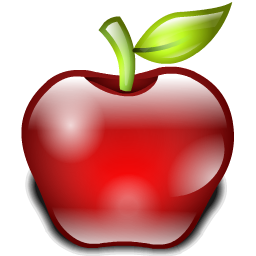

In [3]:
img

Pour l'afficher avec des axes et -- lorsque l'image a une basse
résolution -- mieux repérer les pixels individuels, on peut utiliser
`matplotlib`:

In [4]:
import matplotlib.pyplot as plt

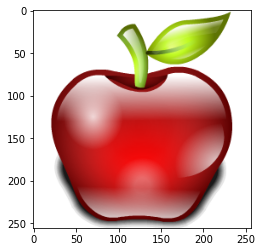

In [5]:
plt.imshow(img);

<div class="alert alert-info">

Pourquoi un `;` à la fin de la commande précédente?  Parce que
`plt.imshow` ne renvoie pas une image, mais l'affiche par effet de
bord. Le `;` évite l'affichage de ce que renvoie vraiment `plt.imshow`
(un objet de type figure).

Cette approche quelque peu datée est traditionnelle dans des systèmes
comme `Matlab`. La bibliothèque `matplotlib.pyplot` l'a reproduit pour
faciliter la migration d'utilisateurs de ces systèmes. Par habitude
beaucoup d'exemples sur internet utilisent encore cette approche; cela
peut rester pratique comme raccourci dans des exemples en une ligne
comme ci-dessus.

Mais on sait depuis -- et c'est ce que nous vous enseignons depuis le
début de l'année -- que l'on obtient du code beaucoup plus modulaire
si l'on sépare proprement les traitements et calculs (par exemple
construire une figure) des entrées et sorties (par exemple afficher la
figure).

De ce fait, pour tout usage non trivial, il est préférable d'utiliser
l'interface objet de `matplotlib`, comme dans l'exemple suivant:
    
</div>

In [6]:
from matplotlib.figure import Figure

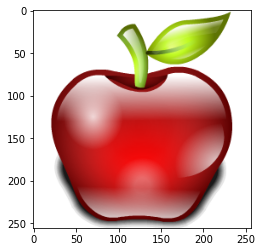

In [7]:
fig = Figure()              # Construction d'une nouvelle figure
subplot = fig.add_subplot() # Ajout d'une zone de dessin (appelée «axes» dans matplotlib) à la figure
subplot.imshow(img)         # Ajout d'une image à la zone de dessin
fig                         # Affichage de la figure

Consultez la documentation de **PIL Image** sur internet, pour trouver
comment obtenir la largeur et la hauteur de cette image. Stockez le
résultat dans des variables `width` et `height` et vérifiez la
cohérence avec la figure ci-dessus.

In [8]:
width,height = img.width,img.height

In [9]:
assert width == 256
assert height == 256

## Images comme tableaux

On souhaite maintenant pouvoir accéder au contenu de l'image pour
pouvoir calculer avec. Pour cela, nous allons convertir l'image en un
tableau de nombres `NumPy`, tels ceux que nous avons manipulés dans la
[fiche précédente](1_tableaux.md).

Voici le tableau associé à l'image:

In [10]:
import numpy as np

In [11]:
M = np.array(img)

En vous référant éventuellement au cours, combien de lignes, de
colonnes et de couches devrait avoir ce tableau?

Ce tableau devrait avoir 3 couches de respectivement longueur 256,256, et 4.
Il y a 256 lignes pour la hauteur, 256 colonnes pour la largeur et 4 pour les couches rgb + alpha.

Vérifier avec l'attribut `shape`:

In [12]:
M.shape

(256, 256, 4)

Pourquoi quatre couches? Rouge, Vert, Bleu, ... et transparence!

### Comprendre les couches de couleurs

Comme toujours, pour mieux comprendre des données, il faut les
visualiser !  Voici une figure représentant notre image et ses trois
couches rouge, vert, bleu.  Observez comment les couleurs de l'image
de départ (blanc, vert, noir, rouge) se décomposent dans les
différentes couches.

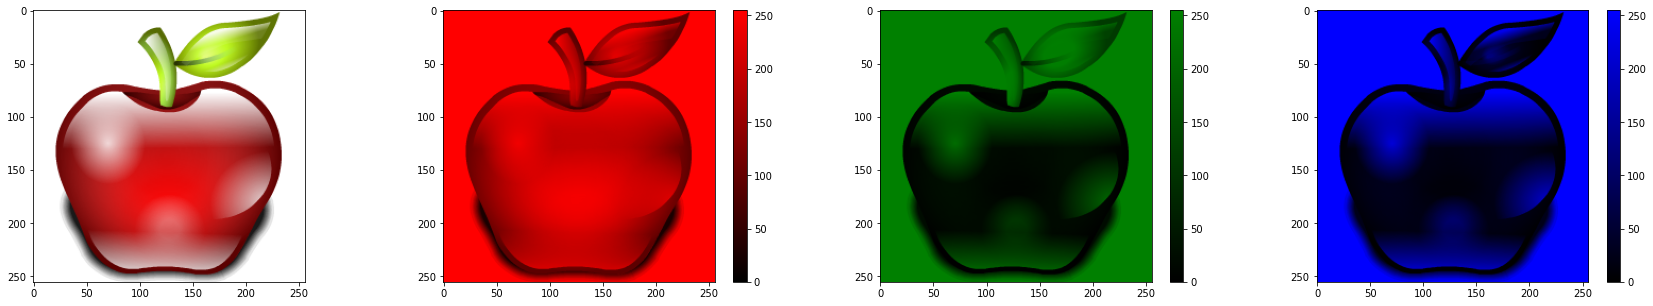

In [13]:
# Échelles de couleur (colormap) allant du noir à la couleur primaire correspondante
from matplotlib.colors import LinearSegmentedColormap
black_red_cmap   = LinearSegmentedColormap.from_list('black_red_cmap',   ["black", "red"])
black_green_cmap = LinearSegmentedColormap.from_list('black_green_cmap', ["black", "green"])
black_blue_cmap  = LinearSegmentedColormap.from_list('black_blue_cmap',  ["black", "blue"])

fig = Figure(figsize=(30, 5));
(subplot, subplotr, subplotg, subplotb) = fig.subplots(1, 4)  # Quatre zones de dessin
# Dessin de l'image et de ses trois couches
subplot.imshow(M)
imgr = subplotr.imshow(M[:,:,0], cmap=black_red_cmap,   vmin=0, vmax=255)
imgg = subplotg.imshow(M[:,:,1], cmap=black_green_cmap, vmin=0, vmax=255)
imgb = subplotb.imshow(M[:,:,2], cmap=black_blue_cmap,  vmin=0, vmax=255)
# Ajout des barres d'échelle de couleur aux images
fig.colorbar(imgr, ax=subplotr);
fig.colorbar(imgg, ax=subplotg);
fig.colorbar(imgb, ax=subplotb);
fig

Par la suite, nous visualiserons de même de nombreuses images.  Il est
donc temps d'automatiser la construction de la figure ci-dessus.
Ouvrez le fichier `utilities.py` et complétez-y la fonction
`show_color_channels` à partir du code ci-dessus.

In [14]:
# Automatically reload code when changes are made
%load_ext autoreload
%autoreload 2
from utilities import *

In [15]:
show_source(show_color_channels)

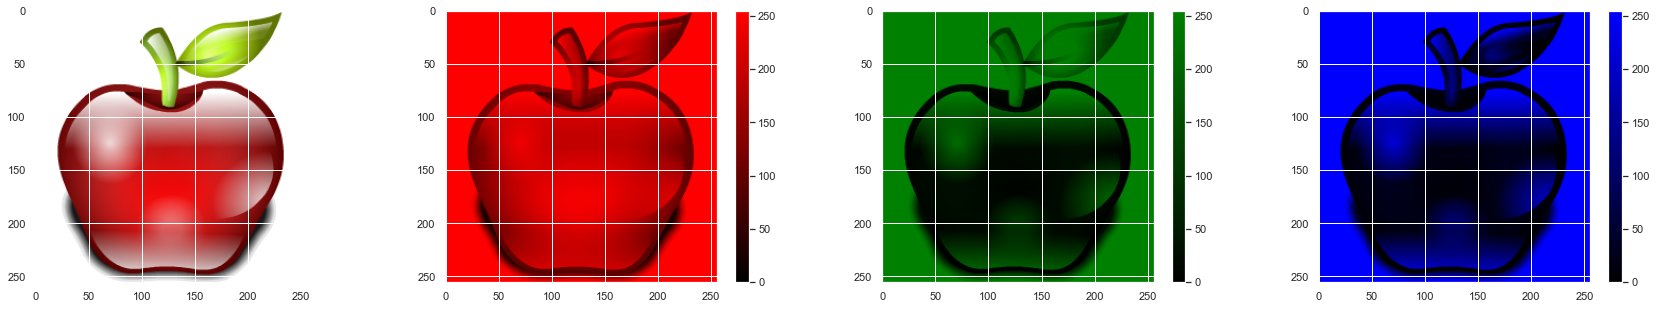

In [16]:
show_color_channels(img)

Vérification: `show_color_channels` renvoie bien une figure

In [17]:
assert isinstance(show_color_channels(img), Figure)

Étudions maintenant les images du jeu de données de la semaine
dernière:

In [18]:
#from intro_science_donnees import data
import os.path
#dataset_dir = os.path.join(data.dir, 'ApplesAndBananasSimple')
images = load_images("data/ApplesAndBananasSimple/", "*.png")

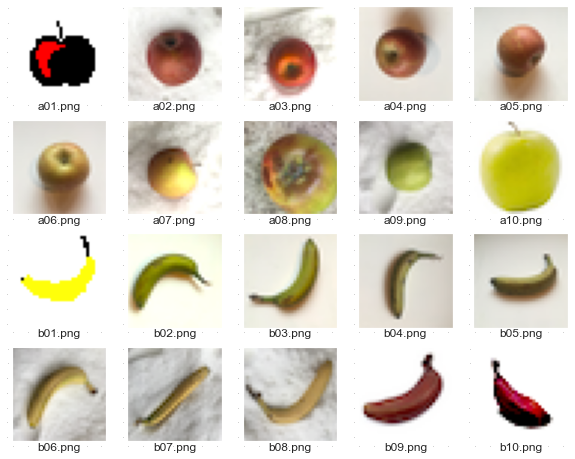

In [19]:
image_grid(images, titles=images.index)

Observez l'image suivante et ses couches. Expliquez ce que vous
voyez. Essayez d'autres exemples.

On voit ci-dessous les 4 couches RGB + alpha d'une banane.On constate que la proportion de bleu des bananes est assez comparée à celle du rouge et du vert.

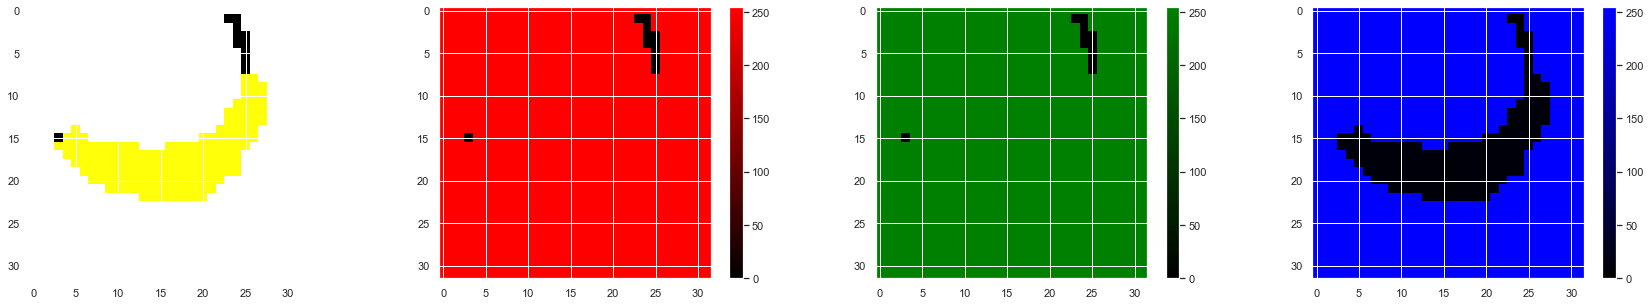

In [20]:
img = images[10]
show_color_channels(img)

Nous allons maintenant observer l'**histogramme des couleurs**
apparaissant dans une image, en utilisant l'utilitaire
`color_histogram` (vous pouvez comme d'habitude en consulter la
documentation et le code par introspection avec `color_histogram?` et
`color_histogram??`):

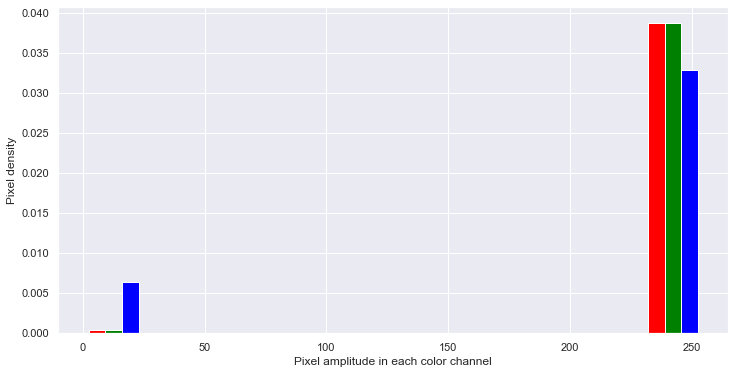

In [21]:
color_histogram(img)

Observez les histogrammes ci-dessous de la dixième et la troisième
image, et interprétez-les.

On constate que la proportion de bleu dans la pomme est aussi assez faible que celle dans la banane.
Cependant les pommes semblent avoir une plus faible proportion de rouge et vert que l'image de la banane ci-dessus.
On peut donc en conclure que les bananes sont en moyenne plus jaune par rapport aux pommes.

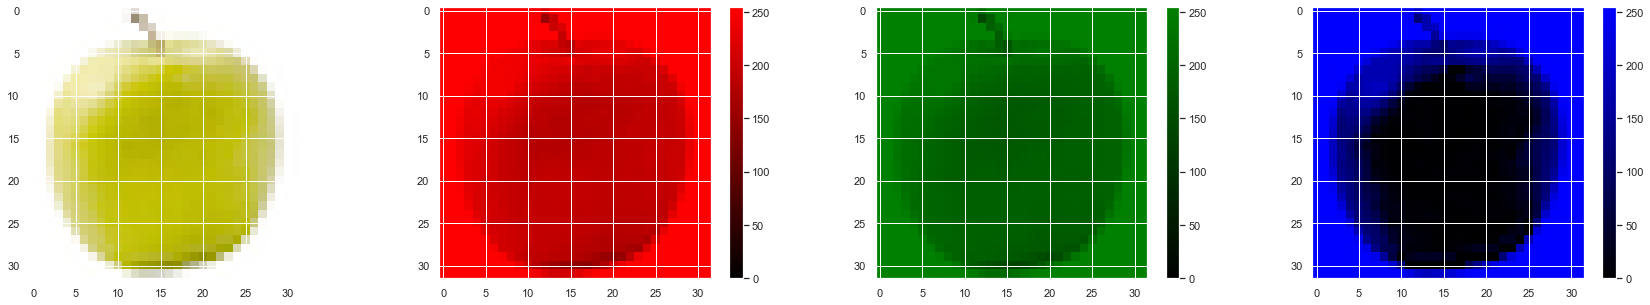

In [22]:
img = images[9]
show_color_channels(img)

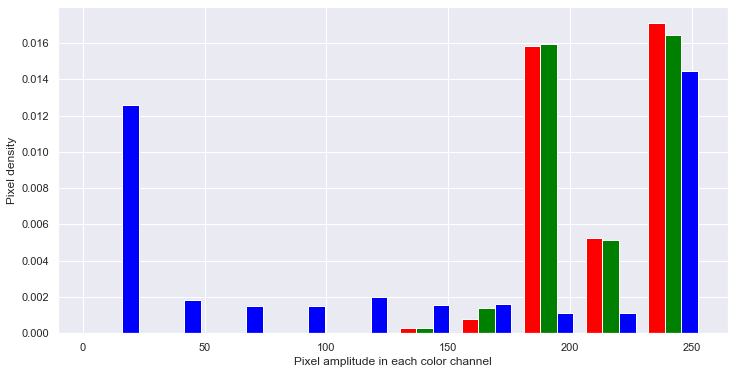

In [23]:
color_histogram(img)

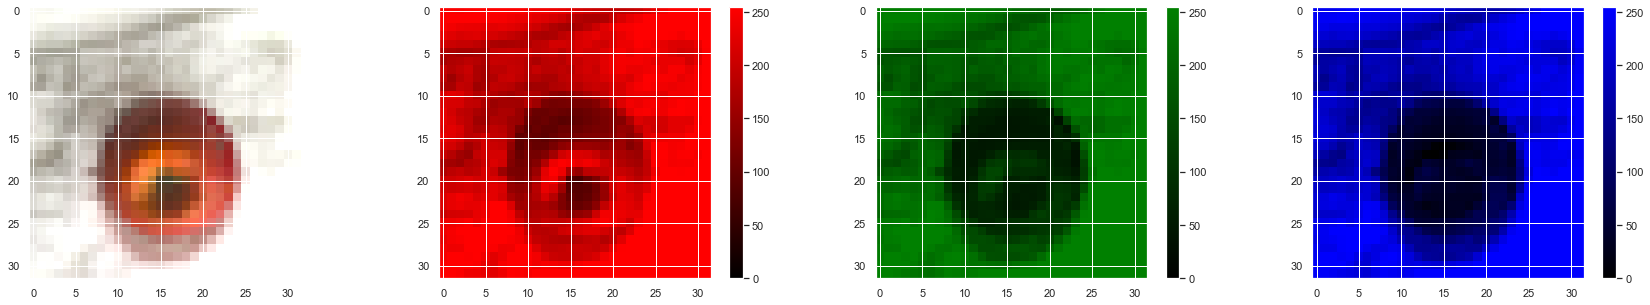

In [24]:
img = images[2]
show_color_channels(img)

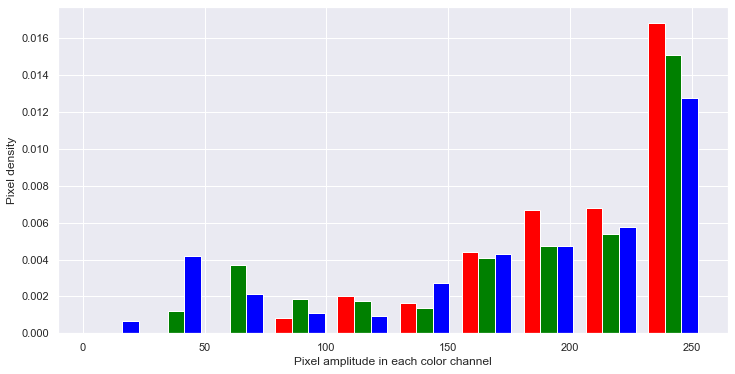

In [25]:
color_histogram(img)

## Séparation des couleurs

Nous allons maintenant extraire les trois canaux, rouge, vert,
bleu. Pour le canal des rouges, on extrait le sous-tableau à deux
dimensions de toutes les cases d'indice $(i,j,k)$ avec $k=0$. Le 
`* 1.0` sert à convertir les valeurs en nombres à virgule.

In [26]:
R = M[:,:,0] * 1.0

Regarder le résultat directement n'est pas très informatif :

In [27]:
R

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

Comme d'habitude, il vaut mieux le *visualiser* :

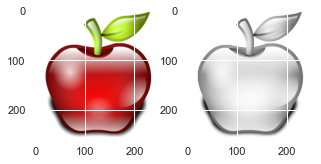

In [28]:
fig = Figure(figsize=(5,5))
ax, axr = fig.subplots(1,2)
ax.imshow(M)
axr.imshow(R, cmap='Greys_r', vmin=0, vmax=255)
fig

3. Extrayez de même le canal des verts et des bleus de la première
   image dans les variables `G` et `B`. N'hésitez pas à les
   visualiser !

In [29]:
G = M[:,:,1]*1.0

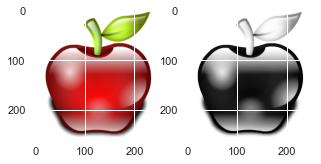

In [30]:
fig = Figure(figsize=(5,5))
ax, axr = fig.subplots(1,2)
ax.imshow(M)
axr.imshow(G, cmap='Greys_r', vmin=0, vmax=255)
fig

In [31]:
assert G.shape == (256, 256)
assert abs(G.mean() - 158.27) < 0.1

In [32]:
B = M[:,:,2]*1.0

In [33]:
assert B.shape == (256, 256)
assert abs(B.mean() - 148.39) < 0.1

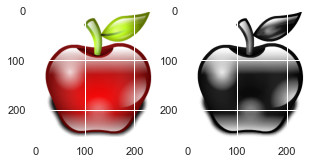

In [34]:
fig = Figure(figsize=(5,5))
ax, axr = fig.subplots(1,2)
ax.imshow(M)
axr.imshow(B, cmap='Greys_r', vmin=0, vmax=255)
fig

Il est maintenant facile de faire de l'arithmétique sur tous les
pixels. Par exemple la somme des intensités en vert et rouge s'écrit:

In [35]:
G + R

array([[510., 510., 510., ..., 510., 510., 510.],
       [510., 510., 510., ..., 510., 510., 510.],
       [510., 510., 510., ..., 510., 510., 510.],
       ...,
       [510., 510., 510., ..., 510., 510., 510.],
       [510., 510., 510., ..., 510., 510., 510.],
       [510., 510., 510., ..., 510., 510., 510.]])

### Exercice

1. Calculez et visualisez la luminosité de tous les pixels de l'image,
   la *luminosité* d'un pixel $(r,g,b)$ étant définie comme la moyenne
   $v=\frac{r+g+b}{3}$:

In [36]:
V = (R + G + B )/ 3

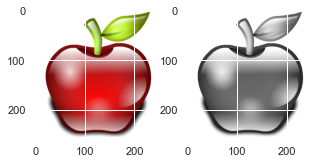

In [37]:
fig = Figure(figsize=(5,5))
ax, axr = fig.subplots(1,2)
ax.imshow(M)
axr.imshow(V, cmap='Greys_r', vmin=0, vmax=255)
fig

In [38]:
assert V.shape == (256, 256)
assert abs(V.mean() - 172.44) < 0.1

Vous venez de transformer l'image en niveaux de gris! Pour que cela
colle au mieux avec notre perception visuelle, il faudrait en fait
utiliser une moyenne légèrement pondérée; voir par exemple la
[Wikipedia](https://fr.wikipedia.org/wiki/Niveau_de_gris#Convertir_une_image_couleur_en_niveau_de_gris).

Niveau de gris pondérée

In [39]:
V = (0.2126*R + 0.7152*G + 0.0722*B)/3

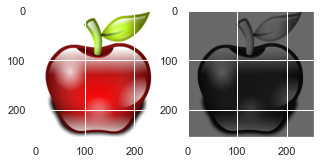

In [40]:
fig = Figure(figsize=(5,5))
ax, axr = fig.subplots(1,2)
ax.imshow(M)
axr.imshow(V, cmap='Greys_r', vmin=0, vmax=255)
fig

## Conclusion

Vous avons vu dans cette feuille comment charger une image dans Python
et effectuer quelques manipulations, visualisations et calculs simples
dessus. Cela a été l'occasion de mieux comprendre la décomposition
d'une image en couches de couleur.

**Exercice :** Mettez à jour votre rapport, et notamment la section
« revue de code » pour vérifier vos utilitaires dans
<a href="utilities.py">utilities.py</a>.

Vous pouvez maintenant passer à
l'[extraction d'attributs](3_extraction_d_attributs.md)